In [1]:
##Import libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the wine quality dataset ( downloaded by UCI)
wine_dataset=pd.read_csv("winequality-red.csv")
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#To check the shape of the dataset
wine_dataset.shape

(1599, 12)

In [4]:
#Check the datatypes of the dataset
wine_dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
#Column names
wine_dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#to check the data columns with datatype
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#Check the stats ( if 75% and max difference is more then outliers are present) 
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations : 
    1. Residual sugar,Free sulfur dioxide , total sulfur dioxide, Fixed Acidity have outliers present

In [8]:
#check the quality rating
wine_dataset.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Observations : 
  1. quality ranges from 1 to 10 ( 10 highest and 1 lowest)
  2. 3 is lowest is the dataset and 7 highest 

In [9]:
#Check the count as per the quality
wine_dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observations:
    1.Quality has most values concentrated in the categories of 5,6,7 
    2.Few observations are present in the categories in 3 and 8

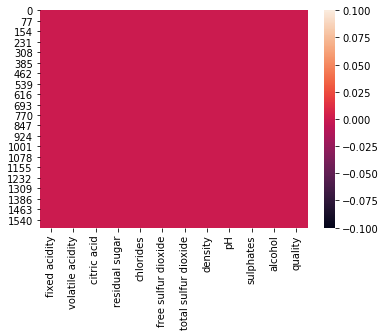

In [10]:
#check null or missing values
sns.heatmap(wine_dataset.isnull())

Observations:
    1. No missing values

In [11]:
#number of unique value in each features as data as only integers and float 
for col in wine_dataset.columns.values:
    print("Number of unique values of {}: {} ".format(col,wine_dataset[col].nunique()))

Number of unique values of fixed acidity: 96 
Number of unique values of volatile acidity: 143 
Number of unique values of citric acid: 80 
Number of unique values of residual sugar: 91 
Number of unique values of chlorides: 153 
Number of unique values of free sulfur dioxide: 60 
Number of unique values of total sulfur dioxide: 144 
Number of unique values of density: 436 
Number of unique values of pH: 89 
Number of unique values of sulphates: 96 
Number of unique values of alcohol: 65 
Number of unique values of quality: 6 


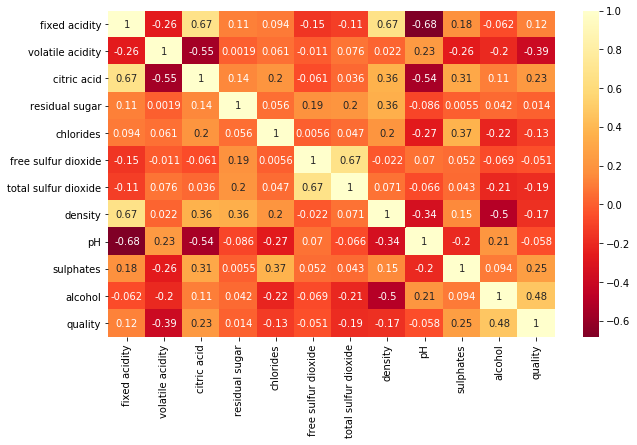

In [12]:
#Correlation
cor=wine_dataset.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,cmap='YlOrRd_r',annot=True)

In [13]:
#Create Pivot table to understand each feature attribute correlates with quality in table format 
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df_pivot_table = wine_dataset.pivot_table(colum_names,
               ['quality'], aggfunc='median')
print(df_pivot_table)

         alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                             
3          9.925     0.0905        0.035  0.997565           7.50   
4         10.000     0.0800        0.090  0.996500           7.50   
5          9.700     0.0810        0.230  0.997000           7.80   
6         10.500     0.0780        0.260  0.996560           7.90   
7         11.500     0.0730        0.400  0.995770           8.80   
8         12.150     0.0705        0.420  0.994940           8.25   

         free sulfur dioxide    pH  residual sugar  sulphates  \
quality                                                         
3                        6.0  3.39             2.1      0.545   
4                       11.0  3.37             2.1      0.560   
5                       15.0  3.30             2.2      0.580   
6                       14.0  3.32             2.2      0.640   
7                       11.0  3.28             2.3      0

Observation: 
    Alcohol content improves wine quality rating as per the correlation matrix : plot and pivot table

In [14]:
#Check number of null values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
#remove outliers
from scipy.stats import zscore
z=abs(zscore(wine_dataset))
print(wine_dataset.shape)
wine_dataset_final = wine_dataset.loc[(z < 3).all(axis=1)]
print(wine_dataset_final.shape)

(1599, 12)
(1451, 12)


# LinearRegression

In [16]:
# seperate the dataset as response variable and feature variabes
X = wine_dataset_final.drop('quality', axis=1)
Y = wine_dataset_final['quality']
X.shape
Y.shape

(1451,)

In [17]:
#Split data into train and test data - Linear Model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print("r2_score corresponding to random state: " ,r_state, "is", r2_scr)
        if r2_scr >max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state," ",max_r_score)
#the below output shows that we are getting acceptable levl of r2 score in most of the cases and max value is also shown
    return final_r_state

In [18]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,X,Y)

max r2 score corresponding to 73   0.4433642734368788


In [19]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),X,Y,cv=5,scoring='r2').mean()
#Cross validation : Score is less we need to improve our model

0.3245381889812301

In [20]:
#import libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection 

In [21]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()
ABC=AdaBoostClassifier()

In [22]:
# prepare models
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ABC))

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score =  0.5292096219931272


Cross_Val_Score =  0.4480349551251771


r2_scr =  -0.028588696384747925


classification_report
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.58      0.63      0.61       126
           6       0.49      0.50      0.49       115
           7       0.49      0.47      0.48        36
           8       0.00      0.00      0.00         6

    accuracy                           0.53       291
   macro avg       0.31      0.32      0.32       291
weighted avg       0.51      0.53      0.52       291



[[ 0  6  2  0  0]
 [ 1 80 41  3  1]
 [ 0 45 57 13  0]
 [ 0  7 12 17  0]
 [ 0  0  4  2  0]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy_score =  0.6426116838487973


Cross_Val_Score =  0.5065564478034954


r2_scr =  0.31782718581736924


classification_report
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.68      0.79      0.74       126
           6       0.61      0.63      0.62       115
           7       0.58      0.42      0.48        36
           8       0.00      0.00      0.00         6

    accuracy                           0.64       291
   macro avg       0.37      0.37      0.37       291
weighted avg       0.61      0.64      0.62       291



[[  0   6   2   0   0]


No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** LogisticRegression ***********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score =  0.6185567010309279


Cross_Val_Score =  0.579655172413793


r2_scr =  0.3284861360389728


classification_report
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.69      0.75      0.72       126
           6       0.57      0.61      0.59       115
           7       0.48      0.42      0.45        36
           8       0.00      0.00      0.00         6

    accuracy                           0.62       291
   macro avg       0.35      0.36      0.35  

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** DecisionTreeClassifier ***********************


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Accuracy_score =  0.6151202749140894


Cross_Val_Score =  0.463131790269249


r2_scr =  -0.055236071938757014


classification_report
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.71      0.73      0.72       126
           6       0.63      0.57      0.60       115
           7       0.47      0.58      0.52        36
           8       0.00      0.00      0.00   

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** GaussianNB ***********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score =  0.5738831615120275


Cross_Val_Score =  0.5672933396315541


r2_scr =  0.1952492582689278


classification_report
               precision    recall  f1-score   support

           4       0.20      0.12      0.15         8
           5       0.67      0.78      0.72       126
           6       0.57      0.43      0.50       115
           7       0.35      0.50      0.41        36
           8       0.00      0.00      0.00         6

    accuracy                           0.57       291
   macro avg       0.36      0.37      0.36       291
weighted avg       0.56      0.57      0.56       291



[[ 1  7  0  0  0]
 [ 2 98 20  6  0]
 [ 2 41 50 22  0]
 [ 0  1 17 18  0]
 [ 0  0  0  6  0]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** RandomForestClassifier ***********************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Accuracy_score =  0.7044673539518901


Cross_Val_Score =  0.5782711384034009


r2_scr =  0.3977693124793963


classification_report
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         8
           5       0.75      0.82      0.78       126
           6       0.67      0.70   

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** AdaBoostClassifier ***********************


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


Accuracy_score =  0.3848797250859107


Cross_Val_Score =  0.35431270666036846


r2_scr =  -0.43895827991648684


classification_report
               precision    recall  f1-score   support

           4       0.03      0.25      0.05         8
           5       0.57      0.31      0.40       126
           6       0.50      0.62      0.55       115
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00         6

    accuracy                           0.38       291
   macro avg       0.22      0.24      0.20       291
weighted avg       0.44      0.38      0.39       291



[[ 2  4  2  0  0]
 [55 39 32  0  0]
 [17 23 71  4  0]
 [ 1  2 33  0  0]
 [ 0  1  4  1  0]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)





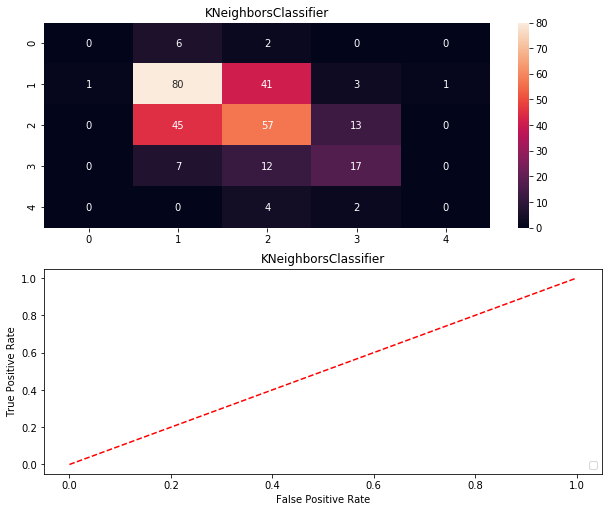

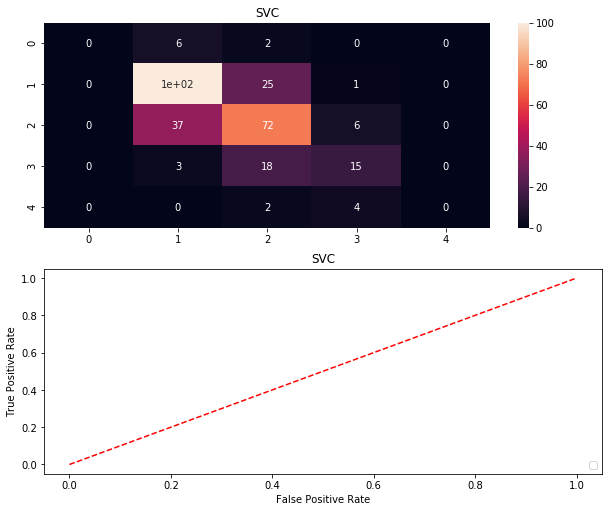

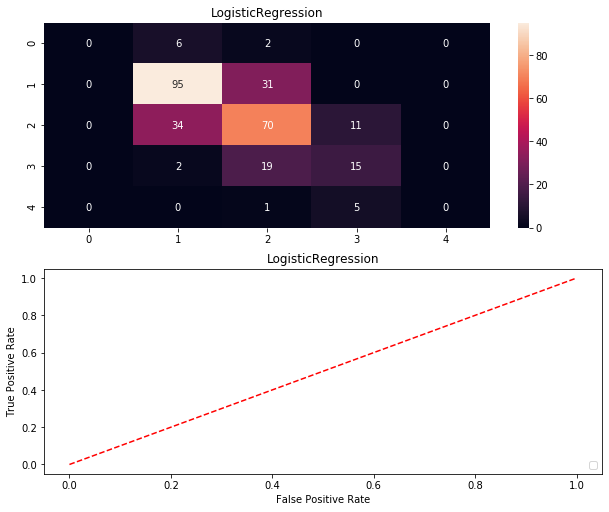

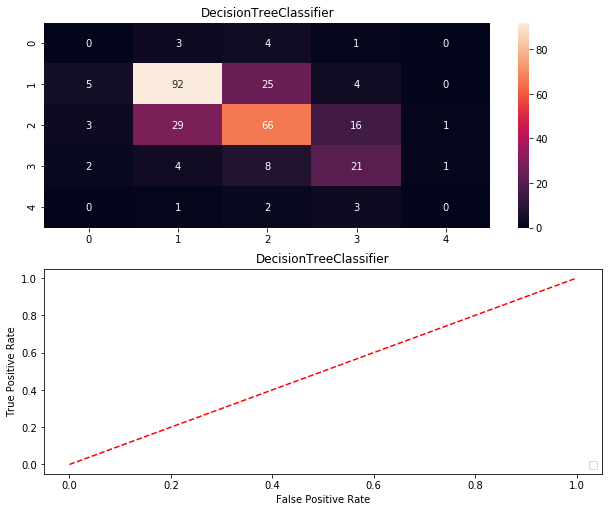

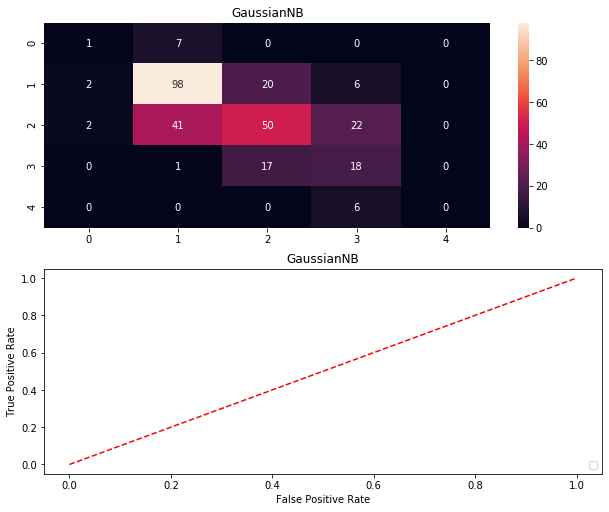

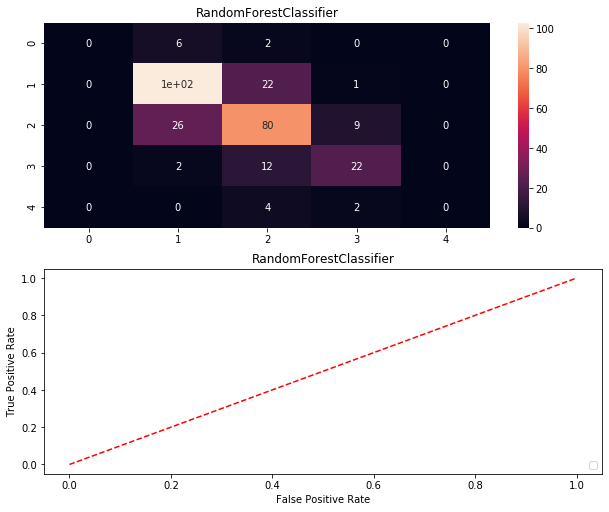

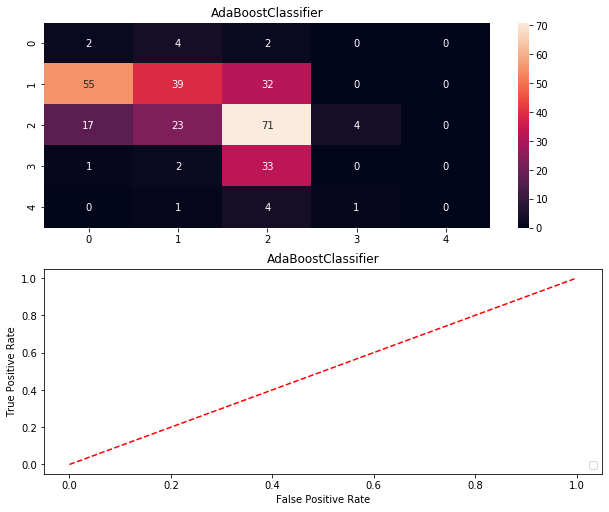

In [24]:
from sklearn.preprocessing import StandardScaler
#Train and Test splitting of datar_state
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = r_state,test_size=0.20)

#Applying Standard scaling to get optimized result
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Model = []
score = []
cvs=[]
r2score=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, X, Y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    r2_scr=r2_score(y_test,pre)
    #roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('r2_scr = ',r2_scr)
    r2score.append(r2_scr)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    #plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [25]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'r2_scr' :r2score ,'Cross_val_score':cvs})
result

,Model,Accuracy_score,r2_scr,Cross_val_score
0,KNeighborsClassifier,52.920962,-0.028589,44.803496
1,SVC,64.261168,0.317827,50.655645
2,LogisticRegression,61.855670,0.328486,57.965517
3,DecisionTreeClassifier,61.512027,-0.055236,46.313179
4,GaussianNB,57.388316,0.195249,56.729334
5,RandomForestClassifier,70.446735,0.397769,57.827114
6,AdaBoostClassifier,38.487973,-0.438958,35.431271


In [26]:
# Save RAndomForestClassifier model as the accuracy score,r2_score and cross_val_score  is more 
from sklearn.externals import joblib

#Save the model as a pickle in a file

joblib.dump(RFC,'wine_rfcfile.obj')

['wine_rfcfile.obj']